<a href="https://colab.research.google.com/github/paultonga/covidprediction/blob/main/covid_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19 Prediction Using Random Forests Alogrithm**
This notebook tries to do the following:
- Import libraries
- Fetch COVID-19 data
- Process the data
- Train a Random Forest model
- Predict future cases 


In [ ]:
%pip install jupyternotify

###**1. Import necessary libraries**
This section imports all rhe necessary libraries for our project

In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)



### **2. Fetch COVID-19 Data**
Fetch the data from ourworlddata.org and display an array of countries

In [ ]:
url_to_covid_data = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df_original_data = pd.read_csv(url_to_covid_data)
df_original_data.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',

#### 2.1 Display a trncated version of the data

In [ ]:
df = df_original_data[df_original_data.location == 'United Kingdom']
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
53259,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53260,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53261,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53262,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53263,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53586,GBR,Europe,United Kingdom,2020-12-23,2155996.0,39387.0,33894.286,69157.0,748.0,505.571,31759.065,580.193,499.282,1018.723,11.018,7.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507384.0,49434314.0,728.196,7.474,437220.0,6.441,0.078,12.9,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53587,GBR,Europe,United Kingdom,2020-12-24,2195144.0,39148.0,34410.857,69732.0,575.0,511.714,32335.737,576.673,506.892,1027.193,8.470,7.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0,1.18,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53588,GBR,Europe,United Kingdom,2020-12-25,2227947.0,32803.0,35017.000,70302.0,570.0,523.143,32818.945,483.207,515.821,1035.589,8.396,7.706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53589,GBR,Europe,United Kingdom,2020-12-26,2262735.0,34788.0,36094.000,70513.0,211.0,476.571,33331.392,512.447,531.685,1038.697,3.108,7.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


#### 2.2 Plot a scatter graph of the data

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


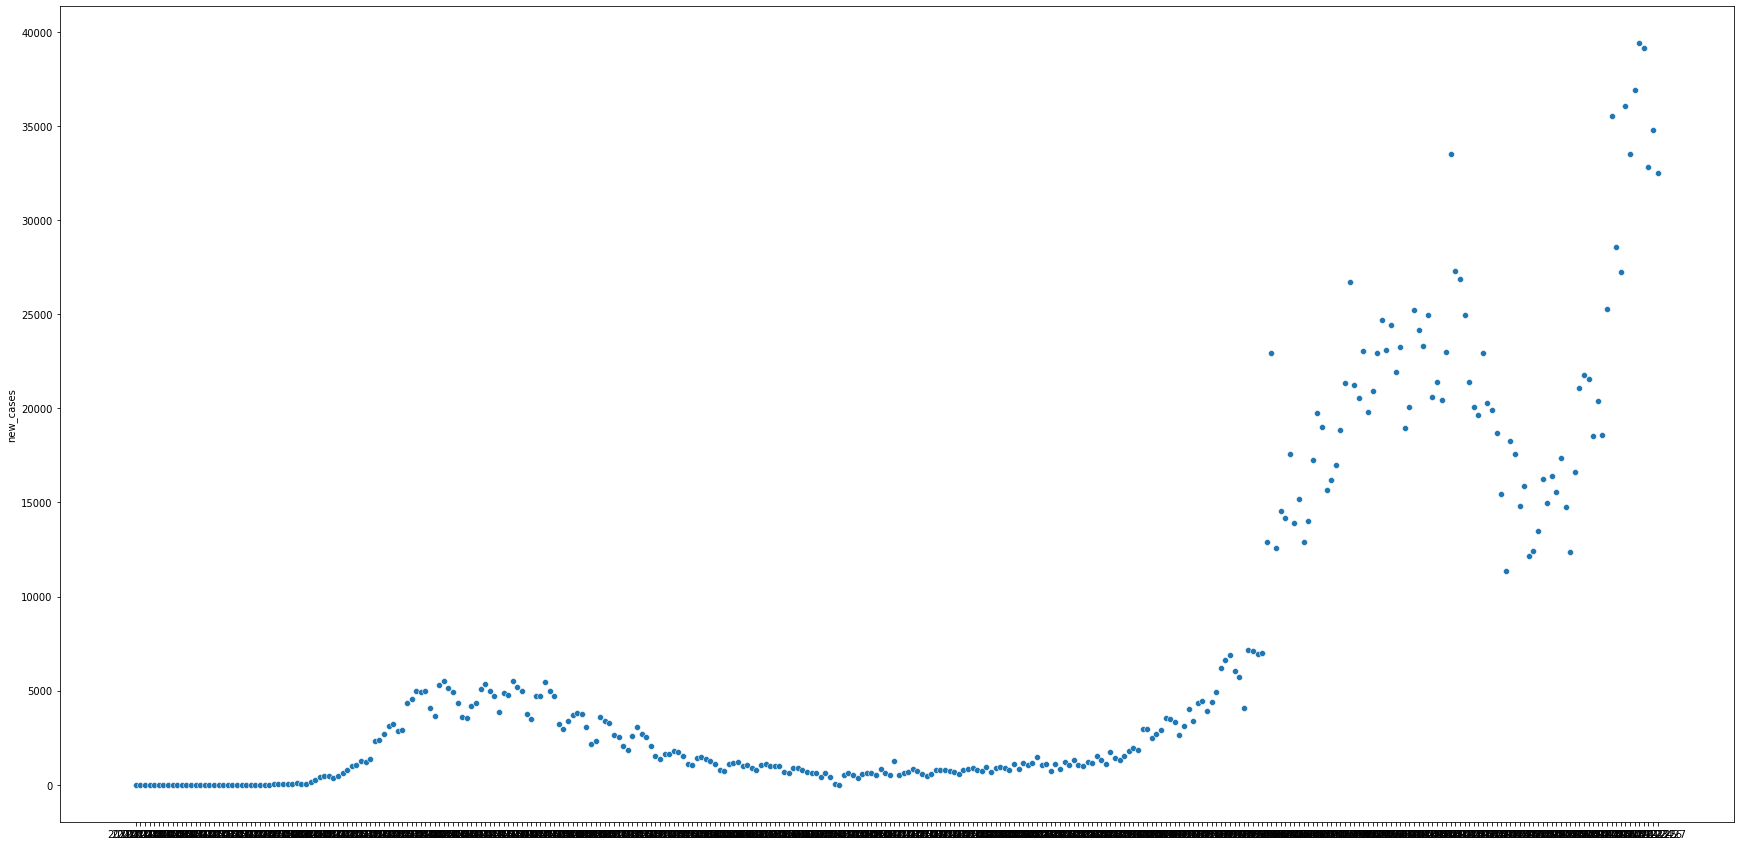

In [ ]:
_ = plt.figure(figsize=(30, 15))
sns.scatterplot(sorted(df.date), df.new_cases);

### **3. Data Processing**
Check for missing data

In [ ]:
df_copy = df_original_data.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56655 entries, 0 to 56654
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            56330 non-null  object 
 1   continent                           55989 non-null  object 
 2   location                            56655 non-null  object 
 3   date                                56655 non-null  object 
 4   total_cases                         56098 non-null  float64
 5   new_cases                           56092 non-null  float64
 6   new_cases_smoothed                  55136 non-null  float64
 7   total_deaths                        47888 non-null  float64
 8   new_deaths                          47887 non-null  float64
 9   new_deaths_smoothed                 55136 non-null  float64
 10  total_cases_per_million             55773 non-null  float64
 11  new_cases_per_million               55767

#### 3.1 Analyze missing data

In [ ]:
percent_missing = df_copy.isnull().sum() * 100 / len(df_copy)
missing_value_df = pd.DataFrame({'column_name': df_copy.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
total_vaccinations,total_vaccinations,99.897626
total_vaccinations_per_hundred,total_vaccinations_per_hundred,99.897626
weekly_icu_admissions_per_million,weekly_icu_admissions_per_million,99.068043
weekly_icu_admissions,weekly_icu_admissions,99.068043
weekly_hosp_admissions_per_million,weekly_hosp_admissions_per_million,98.494396
weekly_hosp_admissions,weekly_hosp_admissions,98.494396
icu_patients,icu_patients,89.065396
icu_patients_per_million,icu_patients_per_million,89.065396
hosp_patients_per_million,hosp_patients_per_million,87.773365
hosp_patients,hosp_patients,87.773365


##### **Missing columns data**

The columns below have more than 50% of the data miaaing

In [ ]:
cols_too_many_missing = missing_value_df[missing_value_df.percent_missing > 50].index.tolist()
len(cols_too_many_missing)
cols_too_many_missing

17

['total_vaccinations',
 'total_vaccinations_per_hundred',
 'weekly_icu_admissions_per_million',
 'weekly_icu_admissions',
 'weekly_hosp_admissions_per_million',
 'weekly_hosp_admissions',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients_per_million',
 'hosp_patients',
 'total_tests_per_thousand',
 'total_tests',
 'new_tests_per_thousand',
 'new_tests',
 'tests_per_case',
 'handwashing_facilities',
 'positive_rate']

##### **Total Number of Columns**

In [ ]:
len(df_copy.columns)

52

##### **Columns (missing data columns removed)**

In [ ]:
df_reduced = df_copy.drop(columns=cols_too_many_missing)
len(df_reduced.columns)

35

##### **Reduced data**

In [ ]:
df_reduced

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56650,ZWE,Africa,Zimbabwe,2020-12-23,12656.0,112.0,129.571,330.0,4.0,2.429,851.515,7.536,8.718,22.203,0.269,0.163,NaN,1710.0,0.115,tests performed,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
56651,ZWE,Africa,Zimbabwe,2020-12-24,12786.0,130.0,131.429,339.0,9.0,3.571,860.261,8.747,8.843,22.808,0.606,0.240,NaN,1697.0,0.114,tests performed,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
56652,ZWE,Africa,Zimbabwe,2020-12-25,12880.0,94.0,119.000,341.0,2.0,3.571,866.586,6.324,8.006,22.943,0.135,0.240,NaN,1632.0,0.110,tests performed,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
56653,ZWE,Africa,Zimbabwe,2020-12-26,12963.0,83.0,116.000,341.0,0.0,3.286,872.170,5.584,7.805,22.943,0.000,0.221,NaN,1576.0,0.106,tests performed,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535


##### **Set reduced data as default dataframe**

In [ ]:
df = df_reduced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56655 entries, 0 to 56654
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         56330 non-null  object 
 1   continent                        55989 non-null  object 
 2   location                         56655 non-null  object 
 3   date                             56655 non-null  object 
 4   total_cases                      56098 non-null  float64
 5   new_cases                        56092 non-null  float64
 6   new_cases_smoothed               55136 non-null  float64
 7   total_deaths                     47888 non-null  float64
 8   new_deaths                       47887 non-null  float64
 9   new_deaths_smoothed              55136 non-null  float64
 10  total_cases_per_million          55773 non-null  float64
 11  new_cases_per_million            55767 non-null  float64
 12  new_cases_smoothed

##### **Remove rows that dont have country ISO and continent**

In [ ]:
missing_iso_code = df[df.iso_code.isna()]
df = df.drop(index=missing_iso_code.index)

missing_continent = df[df.continent.isna()]
df = df.drop(index=missing_continent.index)

for col in df.columns: 
    col, df[col].isna().sum()

('iso_code', 0)

('continent', 0)

('location', 0)

('date', 0)

('total_cases', 557)

('new_cases', 563)

('new_cases_smoothed', 1508)

('total_deaths', 8754)

('new_deaths', 8755)

('new_deaths_smoothed', 1508)

('total_cases_per_million', 557)

('new_cases_per_million', 563)

('new_cases_smoothed_per_million', 1508)

('total_deaths_per_million', 8754)

('new_deaths_per_million', 8755)

('new_deaths_smoothed_per_million', 1508)

('reproduction_rate', 13803)

('new_tests_smoothed', 26508)

('new_tests_smoothed_per_thousand', 26508)

('tests_units', 25411)

('stringency_index', 6021)

('population', 0)

('population_density', 1192)

('median_age', 2414)

('aged_65_older', 3042)

('aged_70_older', 2720)

('gdp_per_capita', 2406)

('extreme_poverty', 19421)

('cardiovasc_death_rate', 1856)

('diabetes_prevalence', 1214)

('female_smokers', 13285)

('male_smokers', 13874)

('hospital_beds_per_thousand', 6243)

('life_expectancy', 289)

('human_development_index', 1828)

### **3. Data Preprocessing**

#### Remove rows and columns that have too many **NaNs**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

##### **Encoding data**

In [ ]:
nominal = df.select_dtypes(include=['object']).copy()
nominal_cols = nominal.columns.tolist()
nominal_cols

['iso_code', 'continent', 'location', 'date', 'tests_units']

In [ ]:
encoder = LabelEncoder()
for col in nominal_cols:
    col
    if df[col].isna().sum() > 0:
        df[col].fillna('MISSING', inplace=True)
    df[col] = encoder.fit_transform(df[col])

'iso_code'

'continent'

'location'

'date'

'tests_units'

In [ ]:
for col in nominal_cols:
    df[col].unique()

array([  0,   2,  49,   3,   1,   7,   5,   6,   8,   9,  10,  18,  17,
        15,  24,  20,  12,  21,  13,  26,  22,  19,  27,  23,  25,  16,
        14,  11,  90,  34,  29,  39,  28, 165,  31,  32,  37,  38,  36,
        40,  33,  73,  41,  42,  43,  35,  47,  45,  46,  48,  50,  51,
       152,  66,  52,  54, 162,  55,  57,  56,  58,  59,  64,  61,  44,
        62,  67,  68,  69,  63,  65,  70,  74,  72,  71,  75,  81,  77,
        76,  79,  80,  78,  82,  83,  84,  86,  85,  87,  88, 132,  93,
        89,  94, 104,  95, 101,  96,  97,  99, 102, 103, 108, 121, 122,
       109, 113, 114, 111, 119, 120, 110, 107, 106, 117, 116, 105, 118,
       115, 123, 129, 127, 130, 126, 124, 125, 112, 128, 131, 133, 141,
       134, 137, 140, 135, 136, 138, 139, 142, 143, 144, 145,  91,  98,
       181, 185, 153, 157, 146, 148, 155, 163, 151, 149, 159, 160, 150,
       154, 187,  92, 156,  53, 100, 147, 158, 161,  30, 164, 173, 168,
       174, 167, 169, 166, 170, 171, 172, 175, 176,   4,  60, 17

array([1, 2, 0, 3, 5, 4])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

array([ 54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 23

array([0, 1, 3, 4, 2])

### **4. Data Imputation**

#### Imputation for data with missing numerical values

In [ ]:
# Data before imputation
numerical = df.select_dtypes(include=['float64']).copy()
numerical

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
1,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
2,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
3,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
4,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56650,12656.0,112.0,129.571,330.0,4.0,2.429,851.515,7.536,8.718,22.203,0.269,0.163,NaN,1710.0,0.115,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
56651,12786.0,130.0,131.429,339.0,9.0,3.571,860.261,8.747,8.843,22.808,0.606,0.240,NaN,1697.0,0.114,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
56652,12880.0,94.0,119.000,341.0,2.0,3.571,866.586,6.324,8.006,22.943,0.135,0.240,NaN,1632.0,0.110,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535
56653,12963.0,83.0,116.000,341.0,0.0,3.286,872.170,5.584,7.805,22.943,0.000,0.221,NaN,1576.0,0.106,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.535


In [ ]:
# Total New Cases count
df.total_cases

0            1.0
1            1.0
2            1.0
3            1.0
4            1.0
          ...   
56650    12656.0
56651    12786.0
56652    12880.0
56653    12963.0
56654    13077.0
Name: total_cases, Length: 55989, dtype: float64

In [ ]:
# Use Mean for imputation
for col in numerical:
    df[col].fillna((df[col].mean()), inplace=True)

In [ ]:
# Check that data does not contain NaNs and is completely encoded
df.isna().sum().sum() == 0

True

### **5. Split into Traiing and Test data**

In [ ]:
X = df.drop(columns=['new_cases'])
y = df.new_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

##### **Training Data**

In [ ]:
X_train

,iso_code,continent,location,date,total_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
43837,146,1,147,152,87142.0,1763.857,525.000000,22.000000,18.000,2503.083,54.030,50.665,15.08000,0.632000,0.517,1.090000,16463.000000,0.473000,3,75.460000,34813867.0,15.322,31.9,3.295,1.845,49045.411,13.151477,259.538,17.72,1.800000,25.400000,2.70,75.13,0.853
16149,66,0,53,343,5183.0,3.857,85.000000,0.000000,0.000,3694.266,12.117,2.749,60.58500,0.000000,0.000,1.041022,31672.844781,1.036943,0,59.378963,1402985.0,45.194,22.4,2.846,1.752,22604.873,13.151477,202.812,7.78,10.625859,32.630963,2.10,58.74,0.591
45666,159,2,153,173,1588.0,5.143,28.000000,0.000000,0.000,290.862,0.183,0.942,5.12900,0.000000,0.000,1.430000,720.000000,0.132000,3,37.960000,5459643.0,113.128,41.2,15.070,9.167,30155.152,0.700000,287.959,7.29,23.100000,37.700000,5.82,77.54,0.855
14910,48,3,49,296,122873.0,346.143,2212.000000,0.000000,2.857,11326.889,0.000,31.909,203.91000,0.000000,0.263,1.000000,3362.000000,0.310000,2,67.590000,10847904.0,222.873,27.6,6.981,4.419,14600.861,1.600000,266.653,8.20,8.500000,19.100000,1.60,74.08,0.736
29477,97,0,97,296,53384.0,791.286,774.000000,6.000000,10.714,7769.141,111.187,115.158,112.64300,0.873000,1.559,1.060000,31672.844781,1.036943,0,78.700000,6871287.0,3.623,29.0,4.424,2.816,17881.509,13.151477,341.862,10.43,10.625859,32.630963,3.70,72.91,0.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46216,150,4,155,348,17.0,0.000,4574.938711,37.363573,0.000,24.750,0.000,0.000,117.06714,1.115657,0.000,1.041022,31672.844781,1.036943,0,36.110000,686878.0,21.841,20.8,3.507,2.043,2205.923,25.100000,459.780,18.68,10.625859,32.630963,1.40,73.00,0.546
52741,176,2,177,178,42932.0,902.429,1121.000000,24.000000,16.714,981.667,21.882,20.635,25.63200,0.549000,0.382,1.100000,11176.000000,0.256000,3,41.670000,43733759.0,77.390,41.4,16.462,11.133,7894.393,0.100000,539.849,7.11,13.500000,47.400000,8.80,72.06,0.751
42938,181,3,143,165,27.0,0.000,4574.938711,37.363573,0.000,243.359,0.000,0.000,117.06714,1.115657,0.000,1.041022,31672.844781,1.036943,0,59.378963,110947.0,281.787,31.8,7.724,4.832,10727.146,13.151477,252.675,11.62,10.625859,32.630963,2.60,72.53,0.723
43892,146,1,147,207,266941.0,2288.714,2733.000000,30.000000,35.286,7667.663,56.529,65.741,78.50300,0.862000,1.014,0.840000,57776.000000,1.660000,3,71.300000,34813867.0,15.322,31.9,3.295,1.845,49045.411,13.151477,259.538,17.72,1.800000,25.400000,2.70,75.13,0.853


### **6. Machine Learning**

In [ ]:
# import nedded libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load

##### **Setup Random Forest model**

In [ ]:
rf = RandomForestRegressor(
    n_estimators = 100, # 400 
    random_state = 0, 
    max_depth=30)

##### **Train the model**

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

##### **Test the trained model**

In [ ]:
y_pred = rf.predict(X_test)

##### **View training accuracy**

In [ ]:
print(f'{r2_score(y_test, y_pred):.2%}')

96.82%


### **7. Hyperparamter Tuning**

Optimal parameters for n_estimators and max_depth are
{'n_estimators': 400, 'max_depth': 30}

In [ ]:
random_grid = {'n_estimators': np.arange(200,600,100),
               'max_depth': np.arange(10,40,10)}

In [ ]:
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = random_grid, 
    n_iter = 100, cv = 3, verbose=2, random_state=0)

In [ ]:
#Re-train the model
rf_random.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] n_estimators=200, max_depth=10 ..................................
[CV] ................... n_estimators=200, max_depth=10, total= 1.0min
[CV] n_estimators=200, max_depth=10 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] ................... n_estimators=200, max_depth=10, total= 1.0min
[CV] n_estimators=200, max_depth=10 ..................................
[CV] ................... n_estimators=200, max_depth=10, total= 1.0min
[CV] n_estimators=300, max_depth=10 ..................................
[CV] ................... n_estimators=300, max_depth=10, total= 1.6min
[CV] n_estimators=300, max_depth=10 ..................................
[CV] ................... n_estimators=300, max_depth=10, total= 1.6min
[CV] n_estimators=300, max_depth=10 ..................................
[CV] ................... n_estimators=300, max_depth=10, total= 1.5min
[CV] n_estimators=400, max_depth=10 ..................................
[CV] ................... n_estimators=400, max_depth=10, total= 2.1min
[CV] n_estimators=400, max_depth=10 ..................................
[CV] ................... n_estimators=400, max_depth=10, total= 2.0min
[CV] n_estimators=400, max_depth=10 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 103.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=30,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                

In [44]:
# Check best parametera
rf_random.best_params_

{'max_depth': 10, 'n_estimators': 500}

##### **Re-run the model with best parametera**

In [48]:
rf = RandomForestRegressor(**rf_random.best_params_, random_state = 1)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [49]:
y_pred = rf.predict(X_test)
print(f'{r2_score(y_test, y_pred):.2%}')

95.80%


### **8. Save the model**

In [50]:
dump(rf, 'rf_model.joblib',compress=3)

['rf_model.joblib']

### **9. Predict new cases**

In [51]:
input_val = 'United Kingdom'
encoder.fit_transform(df_original_data['location'])

array([  0,   0,   0, ..., 191, 191, 191])

In [53]:
encode_ind = (encoder.classes_).tolist().index(input_val)
df_original_data[df_original_data.location == input_val]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
53259,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53260,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53261,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53262,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53263,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53586,GBR,Europe,United Kingdom,2020-12-23,2155996.0,39387.0,33894.286,69157.0,748.0,505.571,31759.065,580.193,499.282,1018.723,11.018,7.447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507384.0,49434314.0,728.196,7.474,437220.0,6.441,0.078,12.9,tests performed,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53587,GBR,Europe,United Kingdom,2020-12-24,2195144.0,39148.0,34410.857,69732.0,575.0,511.714,32335.737,576.673,506.892,1027.193,8.470,7.538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0,1.18,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53588,GBR,Europe,United Kingdom,2020-12-25,2227947.0,32803.0,35017.000,70302.0,570.0,523.143,32818.945,483.207,515.821,1035.589,8.396,7.706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53589,GBR,Europe,United Kingdom,2020-12-26,2262735.0,34788.0,36094.000,70513.0,211.0,476.571,33331.392,512.447,531.685,1038.697,3.108,7.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [54]:
to_pred = X[X.location == encode_ind].iloc[-1].values.reshape(1,-1)

# Predict new cases for input country
rf.predict(to_pred)[0]

142649.608